In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

pd.options.display.max_columns = 200

In [2]:
basedir = Path().resolve().parent
logdir = basedir / "logs"
datadir = basedir / "data"
cachedir = basedir / "cache"

In [30]:
def compute_metric(df):
    y_true, y_pred, u_out = df[["pressure", "pred", "u_out"]].values.T
    mae = (1 - u_out) * np.abs(y_true - y_pred)
    mae = np.sum(mae) / np.sum(1 - u_out)
    return mae

In [20]:
train = pd.read_csv(cachedir / "train-rc-pred-debugFalse.csv")
train.head()

,time_step,u_in,u_out,pressure,kfold,count,corss,cross2,cross3,time_delta,time_step_cumsum,u_in_cumsum,u_in_cummean,u_in_lag_b1,u_out_lag_b1,u_in_lag_b2,u_out_lag_b2,u_in_lag_b3,u_out_lag_b3,u_in_lag_b4,u_out_lag_b4,u_in_lag_b5,u_out_lag_b5,u_in_lag_f1,u_out_lag_f1,u_in_lag_f2,u_out_lag_f2,u_in_lag_f3,u_out_lag_f3,u_in_lag_f4,u_out_lag_f4,u_in_lag_f5,u_out_lag_f5,u_in_diff_b1,u_out_diff_b1,u_in_diff_b2,u_out_diff_b2,u_in_diff_b3,u_out_diff_b3,u_in_diff_b4,u_out_diff_b4,u_in_diff_b5,u_out_diff_b5,u_in_diff_f1,u_out_diff_f1,u_in_diff_f2,u_out_diff_f2,u_in_diff_f3,u_out_diff_f3,u_in_diff_f4,u_out_diff_f4,u_in_diff_f5,u_out_diff_f5,u_in_bwindow_mean,u_in_bwindow_max,u_in_bwindow_min,u_in_bwindow_std,u_in_fwindow_mean,u_in_fwindow_max,u_in_fwindow_min,u_in_fwindow_std,u_in_cwindow_mean,u_in_cwindow_max,u_in_cwindow_min,u_in_cwindow_std,u_in_bwindow_ewm,u_in_fwindow_ewm,u_in_cwindow_ewm,u_in_bwindow_mean_diff,u_in_bwindow_max_diff,u_in_bwindow_min_diff,u_in_fwindow_mean_diff,u_in_fwindow_max_diff,u_in_fwindow_min_diff,u_in_cwindow_mean_diff,u_in_cwindow_max_diff,u_in_cwindow_min_diff,area,area_insp,area_insp_last,u_in_max,u_in_mean,u_in_std,area_max,area_insp_max,area_mean,area_insp_mean,vibs,RC_20_10,RC_20_20,RC_20_50,RC_50_10,RC_50_20,RC_50_50,RC_5_10,RC_5_20,RC_5_50,R_20,R_5,R_50,C_10,C_20,C_50,norm_time_step,u_in_max_diff,area_max_diff,area_insp_max_diff,u_in_mean_diff,area_mean_diff,area_insp_mean_diff,u_in_neib_mean_diff,u_in_neib_median_diff,u_in_neib_best_diff,pressure_neib_mean,pressure_neib_median,pressure_best_neib,u_in_neib_iqr,pressure_neib_iqr,pred_RC_20_10,pred_RC_20_20,pred_RC_20_50,pred_RC_50_10,pred_RC_50_20,pred_RC_50_50,pred_RC_5_10,pred_RC_5_20,pred_RC_5_50,pred_RC_20_10_diff,pred_RC_20_20_diff,pred_RC_20_50_diff,pred_RC_50_10_diff,pred_RC_50_20_diff,pred_RC_50_50_diff,pred_RC_5_10_diff,pred_RC_5_20_diff,pred_RC_5_50_diff,RC_diff
0,0.00000,0.0833,0,5.836,4,1,0.0,0.00000,0.0,0.00000,0.00000,0.0833,0.0833,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,18.39,0.0,22.52,0.0,22.81,0.0,25.36,0.0,27.27,0.0,0.0000,0.0,0.000,0.0,0.000,0.0,0.00,0.0,0.0,0.0,-18.3000,0.0,-22.420,0.0,-22.720,0.0,-25.270,0.0,-27.170,0.0,0.013885,0.0833,0.0,0.03105,19.40,27.27,0.0833,9.0600,5.120,22.52,0.0,8.91,0.05957,26.45,20.69,0.06946,0.0,0.0833,-19.310,-27.170,0.0,-5.040,-22.420,0.0833,0.0000,0.0000,22.6,28.31,18.95,9.52,22.6,22.6,13.58,13.58,13,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0.00000,-28.230,-22.60,-22.60,-18.8800,-13.580,-13.580,-2.6720,-0.624207,-0.4553,5.996,5.835938,5.625,2.116970,0.562500,1.140803e-10,0.000331,0.999669,1.159980e-09,1.025927e-09,1.169029e-09,1.645181e-20,6.674997e-16,1.070758e-09,-1.140803e-10,-0.000331,0.000331,-1.159980e-09,-1.025927e-09,-1.169029e-09,-1.645181e-20,-6.674997e-16,-1.070758e-09,0.000663
1,0.03366,18.3900,0,5.906,4,2,0.0,0.03366,0.0,0.03366,0.03366,18.4700,9.2340,0.0833,0.0,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,22.52,0.0,22.81,0.0,25.36,0.0,27.27,0.0,27.12,0.0,18.3000,0.0,0.000,0.0,0.000,0.0,0.00,0.0,0.0,0.0,-4.1250,0.0,-4.426,0.0,-6.973,0.0,-8.875,0.0,-8.740,0.0,3.078000,18.3900,0.0,6.84400,23.90,27.27,18.3900,3.0920,7.973,22.81,0.0,10.34,13.16000,26.94,22.34,15.30500,0.0,18.3900,-5.523,-8.875,0.0,10.410,-4.426,18.3900,0.6187,0.6187,22.6,28.31,18.95,9.52,22.6,22.6,13.58,13.58,13,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0.02907,-9.930,-21.97,-21.97,-0.5767,-12.960,-12.960,-0.0625,1.421875,-5.3120,6.176,5.976562,6.047,12.000000,0.351562,1.140803e-10,0.000331,0.999669,1.159980e-09,1.025927e-09,1.169029e-09,1.645181e-20,6.674997e-16,1.070758e-09,-1.140803e-10,-0.000331,0.000331,-1.159980e-09,-1.025927e-09,-1.169029e-09,-1.645181e-20,-6.674997e-16,-1.070758e-09,0.000663
2,0.06750,22.5200,0,7.875,4,3,0.0,0.06750,0.0,0.03387,0.10120,40.9700,13.6600,18.3900,0.0,0.0833,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,22.81,0.0,25.36,0.0,27.27,0.0,27.12,0.0,26.81,0.0,4.1250,0.0,22.420,0.0,0.000,0.0,0.00,0.0,0.0,0.0,-0.2996,0.0,-2.846,0.0,-4.750,0.0,-4.617,0.0,-4.297,0.0,6.830000,22.5200,0.0,9.70000,25.31,27.27,22.5200,1.9770,11.14

In [ ]:
valid_preds = pd.read_csv(logdir / "lstm-less-addfeatures-cut-large-custom-mae" / "valid_preds.csv", index_col=0)

In [29]:
cols = ["pressure", "u_out", "kfold"] + [c for c in train.columns if "RC_" in c]
# cols = [c for c in cols if "_diff" not in c]
train_df = train[cols]
train_df["pred"] = valid_preds.values.reshape(-1)
train_df.head()

/tmp/ipykernel_4355/950349259.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["pred"] = valid_preds.values.reshape(-1)


,pressure,u_out,kfold,RC_20_10,RC_20_20,RC_20_50,RC_50_10,RC_50_20,RC_50_50,RC_5_10,RC_5_20,RC_5_50,pred_RC_20_10,pred_RC_20_20,pred_RC_20_50,pred_RC_50_10,pred_RC_50_20,pred_RC_50_50,pred_RC_5_10,pred_RC_5_20,pred_RC_5_50,pred_RC_20_10_diff,pred_RC_20_20_diff,pred_RC_20_50_diff,pred_RC_50_10_diff,pred_RC_50_20_diff,pred_RC_50_50_diff,pred_RC_5_10_diff,pred_RC_5_20_diff,pred_RC_5_50_diff,RC_diff,pred
0,5.836,0,4,0,0,1,0,0,0,0,0,0,1.140803e-10,0.000331,0.999669,1.159980e-09,1.025927e-09,1.169029e-09,1.645181e-20,6.674997e-16,1.070758e-09,-1.140803e-10,-0.000331,0.000331,-1.159980e-09,-1.025927e-09,-1.169029e-09,-1.645181e-20,-6.674997e-16,-1.070758e-09,0.000663,5.797
1,5.906,0,4,0,0,1,0,0,0,0,0,0,1.140803e-10,0.000331,0.999669,1.159980e-09,1.025927e-09,1.169029e-09,1.645181e-20,6.674997e-16,1.070758e-09,-1.140803e-10,-0.000331,0.000331,-1.159980e-09,-1.025927e-09,-1.169029e-09,-1.645181e-20,-6.674997e-16,-1.070758e-09,0.000663,5.880
2,7.875,0,4,0,0,1,0,0,0,0,0,0,1.140803e-10,0.000331,0.999669,1.159980e-09,1.025927e-09,1.169029e-09,1.645181e-20,6.674997e-16,1.070758e-09,-1.140803e-10,-0.000331,0.000331,-1.159980e-09,-1.025927e-09,-1.169029e-09,-1.645181e-20,-6.674997e-16,-1.070758e-09,0.000663,7.906
3,11.740,0,4,0,0,1,0,0,0,0,0,0,1.140803e-10,0.000331,0.999669,1.159980e-09,1.025927e-09,1.169029e-09,1.645181e-20,6.674997e-16,1.070758e-09,-1.140803e-10,-0.000331,0.000331,-1.159980e-09,-1.025927e-09,-1.169029e-09,-1.645181e-20,-6.674997e-16,-1.070758e-09,0.000663,11.870
4,12.234,0,4,0,0,1,0,0,0,0,0,0,1.140803e-10,0.000331,0.999669,1.159980e-09,1.025927e-09,1.169029e-09,1.645181e-20,6.674997e-16,1.070758e-09,-1.140803e-10,-0.000331,0.000331,-1.159980e-09,-1.025927e-09,-1.169029e-09,-1.645181e-20,-6.674997e-16,-1.070758e-09,0.000663,12.370


In [31]:
compute_metric(train_df)

0.16571056865473463

In [51]:
compute_metric(train_df[train_df.RC_diff > 1.])

0.28787986577181207

<AxesSubplot:>

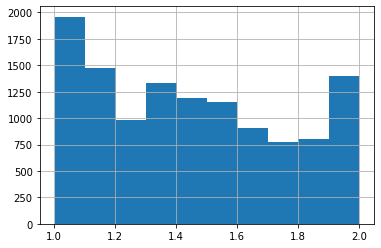

In [47]:
train_df[train_df.RC_diff > 1].RC_diff.hist()